In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict 
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']
xlocs = [2013]
xlocs=xlocs+list(np.arange(2020,2101,10))

In [2]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict=OrderedDict()

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')
print(procs)

['ELCTECOA' 'ELCTEGEO' 'ELCTELNG' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND'
 'FTE-DIMECC17' 'FTE-DIMEHYD13' 'FTE-DIMENUC27' 'FTE-DIMEONUC13'
 'FTE-DIMEPVN17' 'FTE-DIMEWON17' 'FTE-ELCSTG17']


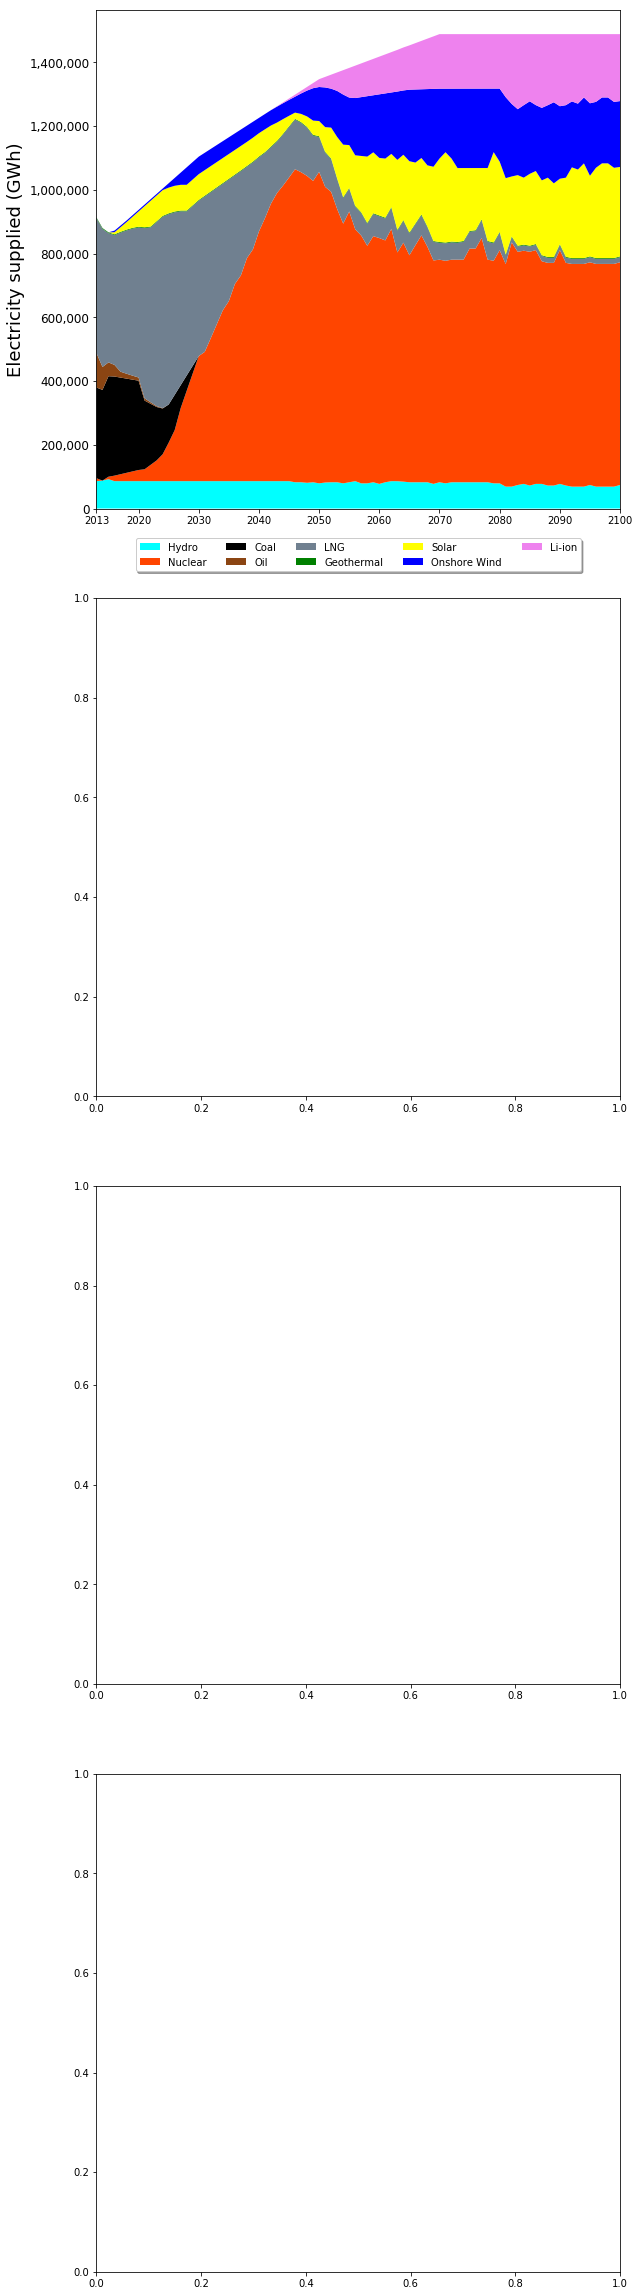

In [3]:
ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'Geothermal','Solar',
           'Onshore Wind',
           'Li-ion'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'green','yellow',
           'blue',
          'violet'
          ]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(8,32))
fig.tight_layout() 
fig.subplots_adjust(hspace=0.18)
pltyrs=range(2013,2101)
ax1.stackplot(pltyrs,  pltdict['FTE-DIMEHYD13'],pltdict['FTE-DIMEONUC13']+pltdict['FTE-DIMENUC27'],
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMECC17'],
             pltdict['ELCTEGEO'],
           pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],
               pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],
              pltdict['FTE-ELCSTG17'],
             labels=ordlegend, colors=colours)
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=12)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_xlim((2013, 2100))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
#ax1.set_xlabel('Years',fontsize='18')
ax1.set_ylabel('Electricity supplied (GWh)',fontsize='18')
ax1.set_xticks(ticks=xlocs)

In [4]:
fname='co2_emi_sources.csv'
colfilter = ['Process','Period','PV']

cdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
cdf = cdf[colfilter]
cdf=cdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
cdf=cdf.reset_index()
cdf.set_index('Period', inplace=True)

procs2 = cdf.Process.unique()
pltdict2={}

for prc in procs2:
    c=cdf.loc[cdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict2[prc]=c['PV']
print(procs2)

['ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG'
 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWON17' 'FTE-ELCSTG17'
 'NEWNUC27']


In [5]:
fname='net_cap.csv'
colfilter = ['Process','Period','PV']

capdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
capdf = capdf[colfilter]
capdf=capdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
capdf=capdf.reset_index()
capdf.set_index('Period', inplace=True)

procs3 = capdf.Process.unique()
pltdict4={}

for prc in procs3:
    c=capdf.loc[capdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=c['PV']
print(procs3)

['ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG'
 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWON17' 'NEWNUC27'
 'STGLION17']


In [6]:
ordlegend2=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'Geothermal','Solar',
           'Onshore Wind','Li-ion'
          ]
           
colours2 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'green','yellow',
           'blue','violet'
          ]
          
pltyrs2=range(2013,2101)
l2 = ax2.stackplot(pltyrs2, pltdict4['ELCTEHYD'],pltdict4['ELCTENUC']+pltdict4['NEWNUC27'],
             pltdict4['ELCTECOA'],pltdict4['ELCTEOIL'], pltdict4['ELCTELNG']+pltdict4['ELCCC17'],
           pltdict4['ELCTEGEO'],
           pltdict4['ELCTEPVS']+pltdict4['ELCPVN17'],
               pltdict4['ELCTEWND']+pltdict4['ELCWON17'],pltdict4['STGLION17'],
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2101))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax2.set_ylabel('Nameplate Capacity (GW)',fontsize='18')
ax2.set_xticks(ticks=xlocs)

In [7]:
ordlegend3=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'Geothermal','Solar',
           'Onshore Wind','Li-ion'
          ]
colours3 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'green','yellow',
           'blue','violet'
          ]
pltyrs3=range(2013,2101)
ax3.stackplot(pltyrs3, pltdict2['ELCTEHYD'],pltdict2['ELCTENUC']+pltdict2['NEWNUC27'],
             pltdict2['ELCTECOA'],pltdict2['ELCTEOIL'], pltdict2['ELCTELNG']+pltdict2['ELCCC17'],
             pltdict2['ELCTEGEO'],
           pltdict2['ELCTEPVS']+pltdict2['ELCPVN17'],
               pltdict2['ELCTEWND']+pltdict2['ELCWON17'],pltdict2['FTE-ELCSTG17'],
             labels=ordlegend3, colors=colours3)
ax3.set_xlim((2013, 2100))
ax3.set_ylabel('Carbon Emissions (million t)',fontsize='18')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax3.set_xticks(ticks=xlocs)

In [8]:
fname='selc_sources.csv'
colfilter = ['Process','Period','PV']

sdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
sdf = sdf[colfilter]
sdf=sdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
sdf=sdf.reset_index()
sdf.set_index('Period', inplace=True)

procs4 = sdf.Process.unique()
pltdict4={}

for prc in procs4:
    s=sdf.loc[sdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=s['PV']
print(procs4)

['FTE-SIMECC17' 'FTE-SIMEHYD17' 'FTE-SIMENUC27' 'FTE-SIMEONUC17'
 'FTE-SIMEPVN17' 'FTE-SIMEWON17']


In [9]:
ordlegend4=['Hydro','Nuclear',
            'LNG',
           'Solar',
           'Onshore Wind'
          ]
colours4 = ['aqua','orangered',
           'slategray',
           'yellow',
           'blue'
          ]
pltyrs4=range(2013,2101)
ax4.stackplot(pltyrs4, pltdict4['FTE-SIMEHYD17'],pltdict4['FTE-SIMEONUC17']+pltdict4['FTE-SIMENUC27'],
             pltdict4['FTE-SIMECC17'],
           pltdict4['FTE-SIMEPVN17'],
               pltdict4['FTE-SIMEWON17'],
             labels=ordlegend4, colors=colours4)
ax4.set_xlim((2013, 2100))
ax4.set_ylabel('Electricity diverted to storage (GWh)',fontsize='18')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax4.set_xticks(ticks=xlocs)
ax4.tick_params(axis="x", labelsize=10)
ax4.tick_params(axis="y", labelsize=12)
ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

['FTE-EPEMH22']


In [10]:
fig.savefig('conv_nuc.png',bbox_inches='tight', dpi=300)